In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

In [3]:
# Load dataset
df = pd.read_csv('/content/supply_chain_inv.csv')
df.head()

,Store_ID,Product_ID,Date,Category,Region,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Weather_Condition,Holiday_Promotion,Competitor_Pricing,Seasonality
0,S001,P0001,01/01/2022,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,S001,P0002,01/01/2022,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,S001,P0003,01/01/2022,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer
3,S001,P0004,01/01/2022,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn
4,S001,P0005,01/01/2022,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer


In [ ]:
# Missing Values
df = df.dropna()

In [ ]:
# Column names
df.columns

Index(['Store_ID', 'Product_ID', 'Date', 'Category', 'Region',
       'Inventory_Level', 'Units_Sold', 'Units_Ordered', 'Demand_Forecast',
       'Price', 'Discount', 'Weather_Condition', 'Holiday_Promotion',
       'Competitor_Pricing', 'Seasonality', 'year', 'month', 'day',
       'day_of_week', 'quarter'],
      dtype='object')

In [ ]:
#convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Additional time based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_of_week'] = df['Date'].dt.dayofweek
df['quarter'] = df['Date'].dt.quarter

In [ ]:
# Shape of the data
df.shape

(12384, 20)

In [ ]:
# About data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12384 entries, 0 to 12383
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Store_ID            12384 non-null  object        
 1   Product_ID          12384 non-null  object        
 2   Date                12384 non-null  datetime64[ns]
 3   Category            12384 non-null  object        
 4   Region              12384 non-null  object        
 5   Inventory_Level     12384 non-null  float64       
 6   Units_Sold          12384 non-null  float64       
 7   Units_Ordered       12384 non-null  float64       
 8   Demand_Forecast     12384 non-null  float64       
 9   Price               12384 non-null  float64       
 10  Discount            12384 non-null  float64       
 11  Weather_Condition   12384 non-null  object        
 12  Holiday_Promotion   12384 non-null  float64       
 13  Competitor_Pricing  12384 non-null  float64       


In [ ]:
# measures of central tendency
df.describe()

,Date,Inventory_Level,Units_Sold,Units_Ordered,Demand_Forecast,Price,Discount,Holiday_Promotion,Competitor_Pricing,year,month,day,day_of_week,quarter
count,12384,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.000000,12384.0,12384.000000,12384.000000,12384.000000,12384.000000
mean,2022-03-03 10:05:34.883720960,273.473191,136.693798,110.388889,141.760778,55.447754,10.113857,0.497658,55.429019,2022.0,2.577519,15.119186,2.993217,1.273256
min,2022-01-01 00:00:00,50.000000,0.000000,20.000000,-9.290000,10.010000,0.000000,0.000000,5.030000,2022.0,1.000000,1.000000,0.000000,1.000000
25%,2022-01-31 00:00:00,160.000000,49.000000,65.000000,54.417500,32.975000,5.000000,0.000000,33.100000,2022.0,1.000000,7.000000,1.000000,1.000000
50%,2022-03-03 00:00:00,272.000000,107.000000,111.000000,112.830000,55.070000,10.000000,0.000000,54.980000,2022.0,3.000000,15.000000,3.000000,1.000000
75%,2022-04-03 00:00:00,387.000000,200.000000,156.000000,206.850000,78.495000,15.000000,1.000000,78.440000,2022.0,4.000000,23.000000,5.000000,2.000000
max,2022-05-04 00:00:00,500.000000,491.000000,200.000000,506.370000,99.990000,20.000000,1.000000,104.570000,2022.0,5.000000,31.000000,6.000000,2.000000
std,NaN,130.036724,109.011917,52.248338,109.380840,25.990912,7.040964,0.500015,26.134024,0.0,1.189661,8.859670,2.015113,0.445649


In [ ]:
# Select features and target variable
features = df[['Store_ID', 'Product_ID', 'Category', 'Region', 'Inventory_Level',
                'Units_Ordered', 'Price', 'Discount', 'Weather_Condition',
                'Holiday_Promotion', 'Competitor_Pricing', 'Seasonality',
                'year', 'month', 'day', 'day_of_week', 'quarter']]
target = df['Units_Sold']  # Assuming you want to forecast Units_Sold
# Convert categorical variables to dummy variables
features = pd.get_dummies(features, drop_first=True)

In [ ]:
# Split the Data
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [ ]:
# Define Neural Network Model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer for regression

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the Model
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=100, batch_size=32)

Epoch 1/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 9395.5322 - val_loss: 7767.4912
Epoch 2/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8013.7192 - val_loss: 9757.6426
Epoch 3/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8054.1646 - val_loss: 7788.0176
Epoch 4/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8179.7388 - val_loss: 7951.7358
Epoch 5/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7724.7515 - val_loss: 7767.6772
Epoch 6/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7899.2773 - val_loss: 7775.3701
Epoch 7/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7665.0884 - val_loss: 7755.0410
Epoch 8/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7801.3369 - val_loss: 7805.2578
Epoch 9/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7826.9004 - val_loss: 7772.4312
Epoch 10/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7807.8760 - val_loss: 7809.0312
Epoch 11/100
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7692.39

In [ ]:
# Evaluate Model Performance
predictions = model.predict(X_val)
mse_value = mean_squared_error(Y_val, predictions)
print(f'Mean Squared Error on Test Set: {mse_value}')

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error on Test Set: 7751.598041823011


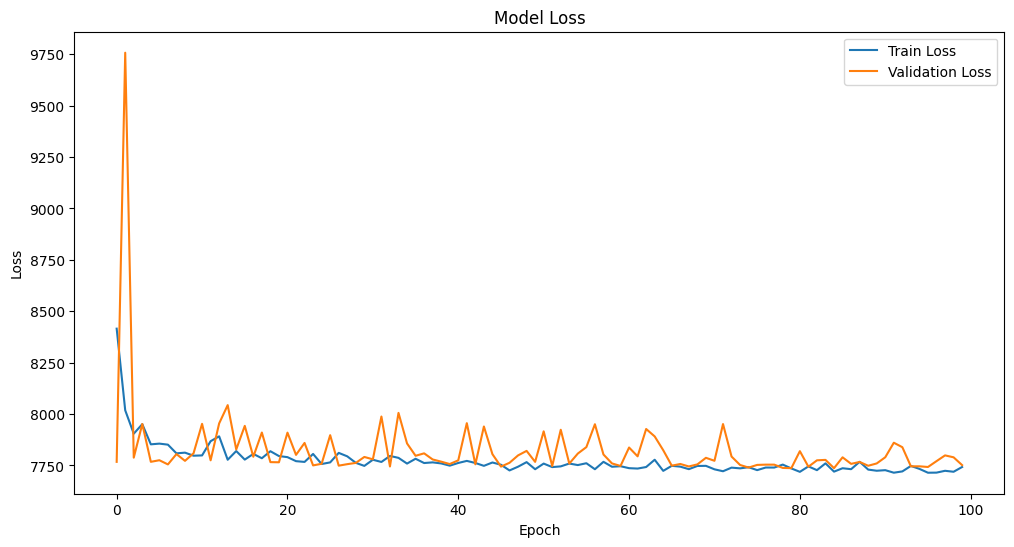

In [ ]:
# Visualize Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

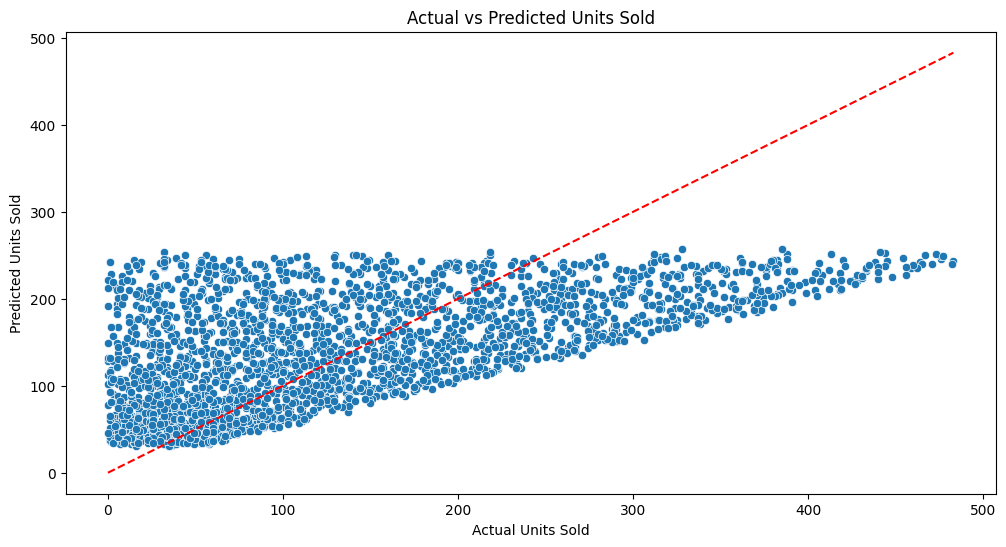

In [ ]:
# Visualize Predictions vs Actual Values
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Y_val, y=predictions.flatten())
plt.xlabel('Actual Units Sold')
plt.ylabel('Predicted Units Sold')
plt.title('Actual vs Predicted Units Sold')
plt.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'r--')  # Diagonal line
plt.show()

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

In [13]:
# Group by date and aggregate
trend_data = df.groupby('Date').agg({
    'Inventory_Level': 'sum',
    'Units_Sold': 'sum',
    'Demand_Forecast': 'sum'
}).reset_index()

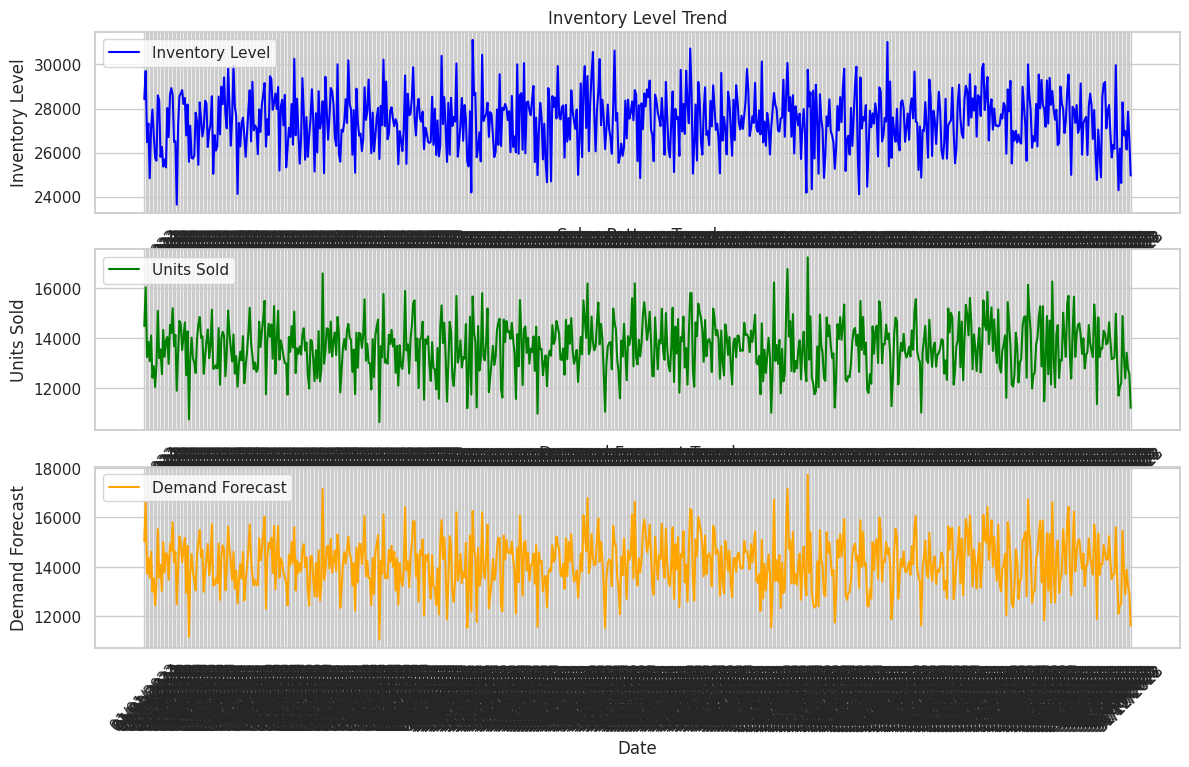

In [18]:
plt.figure(figsize=(14, 8))

# Inventory Level
plt.subplot(3, 1, 1)
plt.plot(trend_data['Date'], trend_data['Inventory_Level'], color='blue', label='Inventory Level')
plt.title('Inventory Level Trend')
plt.xlabel('Date')
plt.ylabel('Inventory Level')
plt.xticks(rotation=45)
plt.legend()

# Units Sold
plt.subplot(3, 1, 2)
plt.plot(trend_data['Date'], trend_data['Units_Sold'], color='green', label='Units Sold')
plt.title('Sales Pattern Trend')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend()

# Demand Forecast
plt.subplot(3, 1, 3)
plt.plot(trend_data['Date'], trend_data['Demand_Forecast'], color='orange', label='Demand Forecast')
plt.title('Demand Forecast Trend')
plt.xlabel('Date')
plt.ylabel('Demand Forecast')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()